In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams
import string
import random

In [2]:
df = pd.read_csv('drifting_longlines.csv')
df.head()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.263956e+13,1.327137e+09,232994.281250,311748.65625,8.2,230.500000,14.865583,-26.853662,-1.0,dalhousie_longliner
1,1.263956e+13,1.327137e+09,233994.265625,312410.34375,7.3,238.399994,14.863870,-26.856800,-1.0,dalhousie_longliner
2,1.263956e+13,1.327137e+09,233994.265625,312410.34375,6.8,238.899994,14.861551,-26.860649,-1.0,dalhousie_longliner
3,1.263956e+13,1.327143e+09,233994.265625,315417.37500,6.9,251.800003,14.822686,-26.865898,-1.0,dalhousie_longliner
4,1.263956e+13,1.327143e+09,233996.390625,316172.56250,6.1,231.100006,14.821825,-26.867579,-1.0,dalhousie_longliner


In [3]:
df.tail()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
13968722,2.812058e+14,1.480029e+09,227700.359375,235147.375000,5.8,88.199997,20.547066,-19.126766,-1.0,crowd_sourced
13968723,2.812058e+14,1.480029e+09,226712.312500,234165.140625,5.9,86.800003,20.547466,-19.122517,-1.0,crowd_sourced
13968724,2.812058e+14,1.480029e+09,226712.312500,234165.140625,6.0,82.099998,20.547501,-19.122417,-1.0,crowd_sourced
13968725,2.812058e+14,1.480031e+09,219642.062500,227102.343750,5.8,70.800003,20.554501,-19.059866,-1.0,crowd_sourced
13968726,2.812058e+14,1.480032e+09,218500.921875,225932.500000,4.5,66.800003,20.557117,-19.049601,-1.0,crowd_sourced


In [4]:
df.is_fishing.unique()

array([-1.        ,  1.        ,  0.        ,  0.6666667 ,  0.33333334,
        0.75      ,  0.25      ])

In [5]:
df.source.unique()

array(['dalhousie_longliner', 'false_positives', 'gfw', 'crowd_sourced'],
      dtype=object)

In [6]:
len(df)

13968727

In [7]:
# FP = df.loc[df.source =='false_positives', :]
# df = df.loc[df.source != 'false_positives', :]

In [8]:
# len(FP)

In [9]:
# len(df)

In [10]:
len(df.mmsi.unique())

110

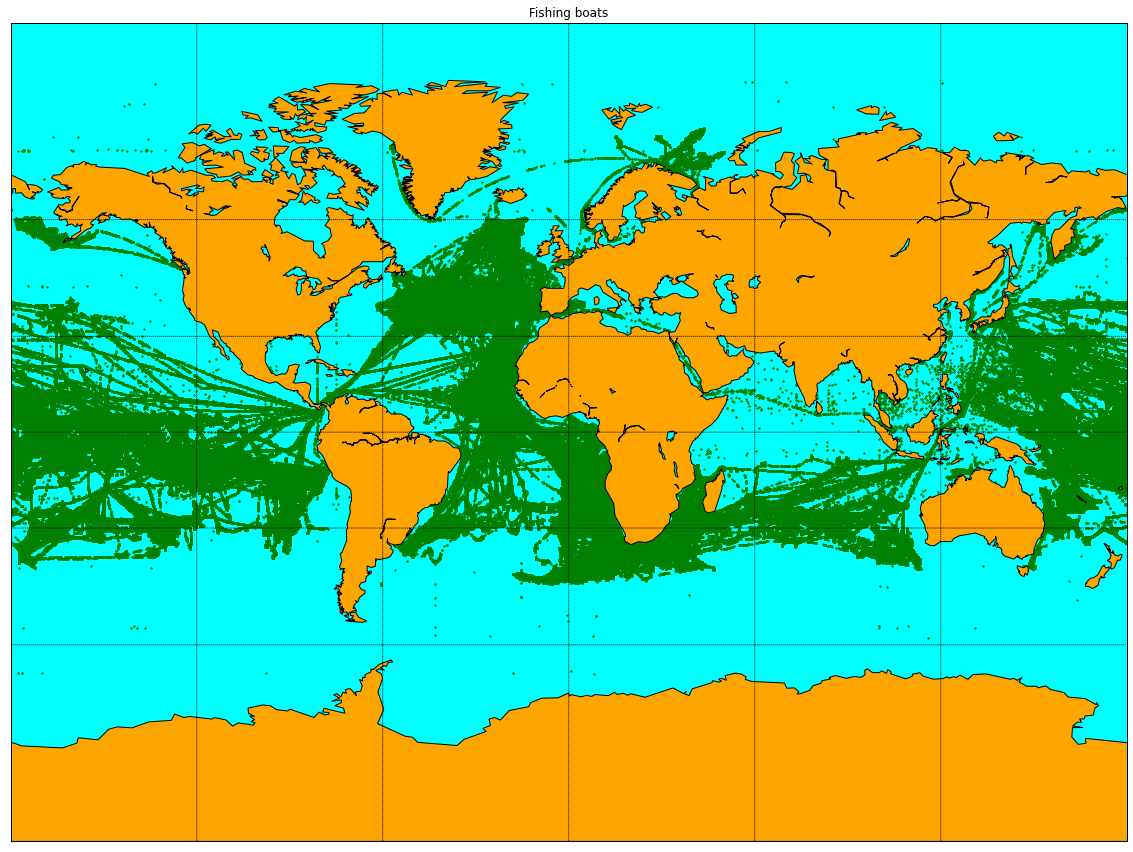

In [11]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lon_array = df.lon.to_numpy()
lat_array = df.lat.to_numpy()
x,y = m(lon_array,lat_array)
m.scatter(x,y,color="green",marker='D',s=np.pi/2)
plt.title("Fishing boats")
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [12]:
mmsi_numbers = df['mmsi'].unique().tolist()

In [34]:
len(mmsi_numbers)

110

In [35]:
# # run until value matches len(mmsi_numbers)

letters = string.ascii_lowercase
Ls1 = ''.join(random.choice(letters) for i in range(len(mmsi_numbers)+1))
letters = string.ascii_uppercase
Ls2 = ''.join(random.choice(letters) for i in range(len(mmsi_numbers)+1))
Ls3 = ''.join(random.choice(letters) for i in range(len(mmsi_numbers)+1))
list_Ls1 = list(Ls1)
list_Ls2 = list(Ls2)
list_Ls3 = list(Ls3)
Names = []
for i in range(len(mmsi_numbers)):
    Names.append(list_Ls1[i]+list_Ls2[i]+list_Ls3[i])
len(set(Names))

110

In [36]:
len(Names)

110

In [37]:
for i in range(len(Names)):
    Names[i] = df[df['mmsi']==mmsi_numbers[i]]        

In [38]:
print(Names[40])

                 mmsi     timestamp  distance_from_shore  distance_from_port  \
4920476  4.097664e+13  1.327482e+09              0.00000         1414.178833   
4920477  4.097664e+13  1.327482e+09              0.00000         1414.178833   
4920478  4.097664e+13  1.327488e+09              0.00000         1414.178833   
4920479  4.097664e+13  1.327492e+09              0.00000         1414.178833   
4920480  4.097664e+13  1.327497e+09              0.00000         1414.178833   
...               ...           ...                  ...                 ...   
5069573  4.097664e+13  1.480027e+09         495088.87500       566845.000000   
5069574  4.097664e+13  1.480029e+09         494996.93750       568675.750000   
5069575  4.097664e+13  1.480030e+09         494987.84375       569757.937500   
5069576  4.097664e+13  1.480031e+09         494987.84375       570032.500000   
5069577  4.097664e+13  1.480032e+09         494988.87500       570866.000000   

         speed      course        lat  

In [39]:
colors = []
for i in range(len(mmsi_numbers)):

    r = random.random()
    b = random.random()
    g = random.random()
    colors.append((r, g, b))

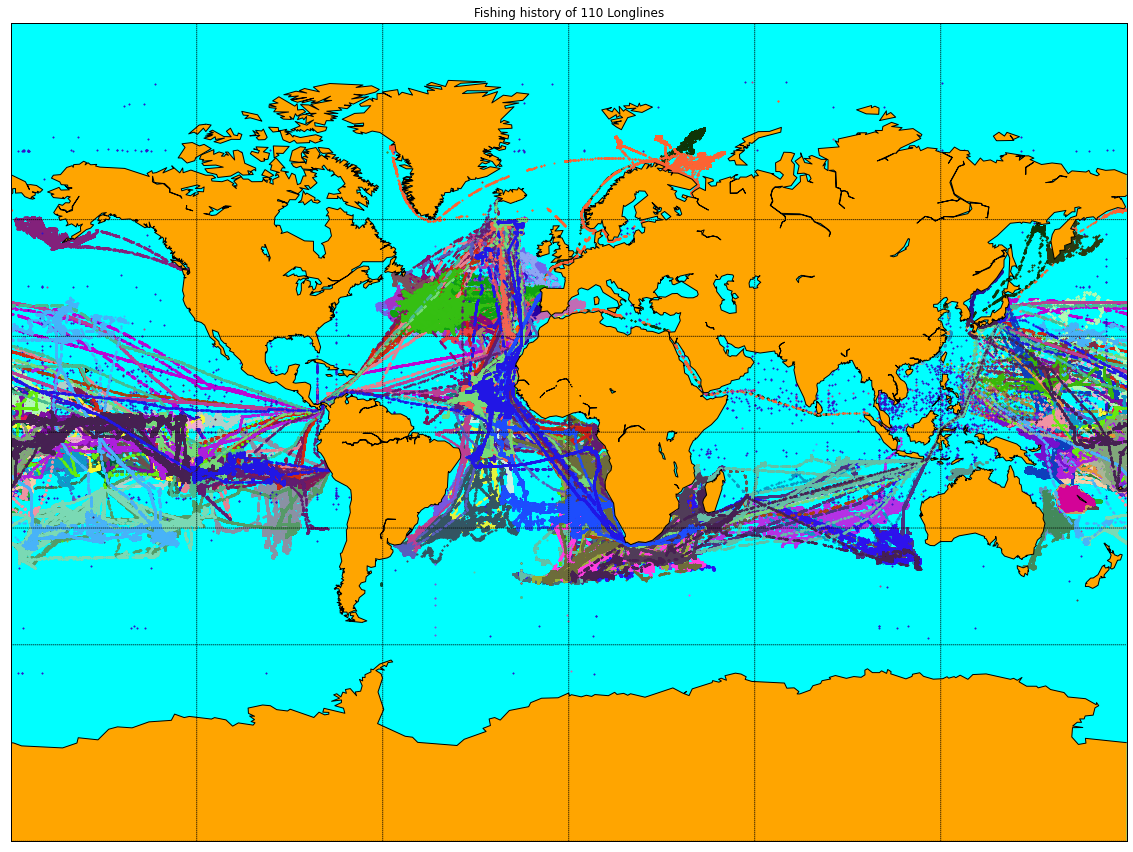

In [41]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

for i in range(len(Names)):
        lon_array = Names[i].lon.to_numpy()
        lat_array = Names[i].lat.to_numpy()
        x,y = m(lon_array,lat_array)
        m.scatter(x,y,color=colors[i],marker='D',s=np.pi/4)
plt.title("Fishing history of 110 Longlines")
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)